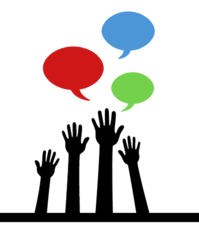


 # The Sparks Foundation: Task-5
 #### Name: Aniruddha Surse
 #### Date: 16-08-2020

#### Problem Statement: Perform EDA on Sales data for Sample Super Store to identify key areas for improving profits.
Methodology:
1. Importing useful packages and data files
2. First Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis / Visulization (Top-Down Approach)
5. Insights (Summary)

# 1. Importing useful packages and data files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
SuperStoreData = pd.read_csv("SampleSuperstore.csv")
# Initial Shape of the Data Frame
Initial_Shape = SuperStoreData.shape
Initial_Shape

(9994, 13)

# 2. First Data Inspection

In [3]:
SuperStoreData

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
SuperStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


No null-valued cells present.

In [5]:
#Statistics of Numerical valued colums
SuperStoreData.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Identify unique objects under each label
SuperStoreData.describe(include ='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


# 3. Data Cleaning

In [7]:
#Deleting Identicle rows to reduce noise from the data
SuperStoreData.drop_duplicates(keep= 'first',inplace=True) 

In [8]:
SuperStoreData

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
#Final Shape of the dataframe
Final_Shape = SuperStoreData.shape
Final_Shape

(9977, 13)

In [10]:
# Initial number of rows vs final
Initial_Shape[0]- Final_Shape[0]

17

### Note: 17 Identical Rows Identified  and removed !

## 4. Exploratory Data Analysis and Visulization (Top-Down Approach) 

### 4.1 What are total Sales and Profits of the company?

In [11]:
Sales_and_Profits = SuperStoreData.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2) # Rounding Numericala entries to 2 decimal places

Sales     2296195.59
Profit     286241.42
dtype: float64

###  Total Sales = 2,296,195.56 USD
### Total Profits = 286,241.42 USD

### 4.2 Top 10 States by Sales and Profits

In [12]:
Top_10_Sales = SuperStoreData.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = SuperStoreData.groupby("State").Profit.sum().nlargest(n =10)

In [13]:
Top_10_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [14]:
Top_10_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

#### Top 10 States by Sales:
'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'
#### Top 10 States by Profit:
'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'

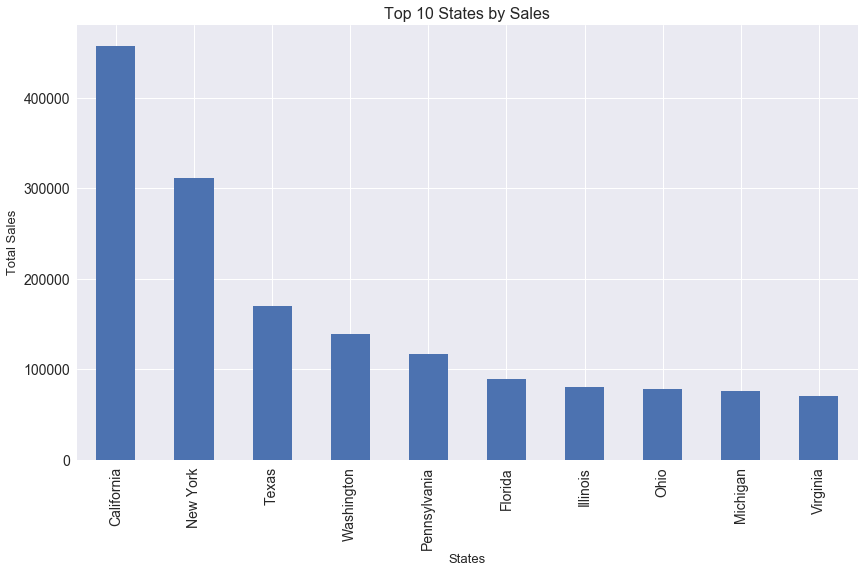

In [15]:
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

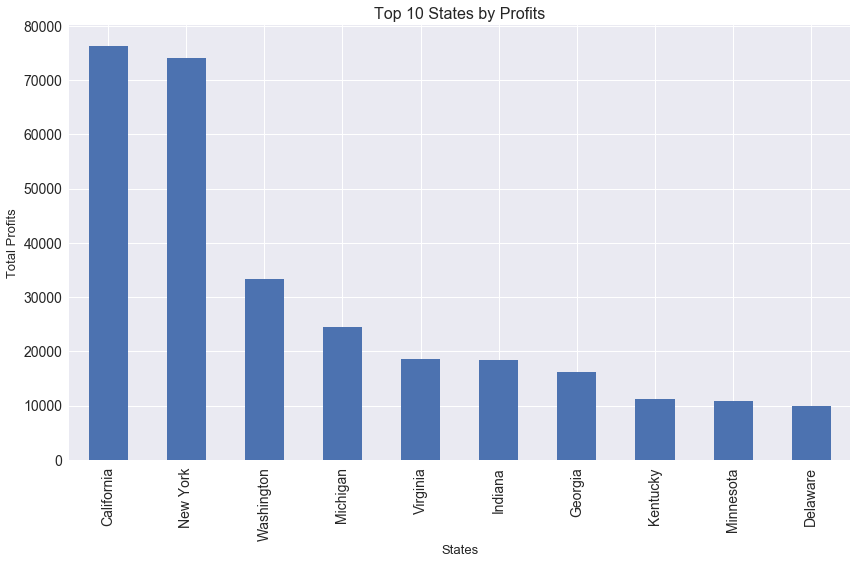

In [16]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

### California and New York are far ahead of their competitor states.

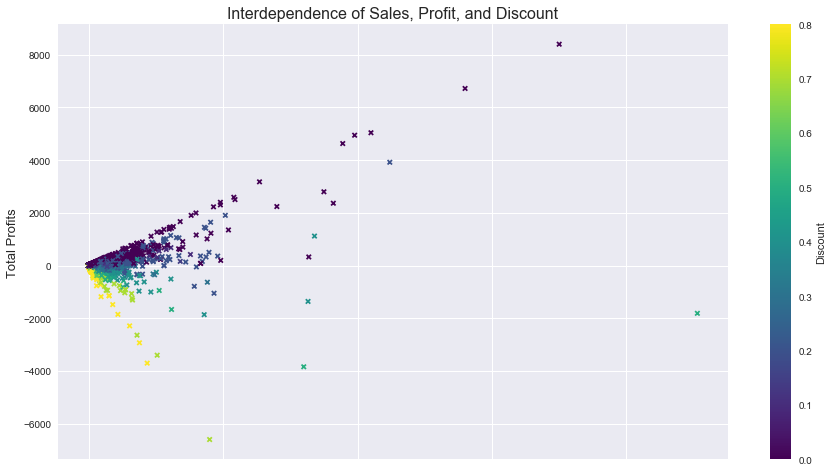

In [17]:
plt.style.use('seaborn')
SuperStoreData.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="x",colormap ="viridis")
plt.ylabel("Total Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

### Discounts are triggering losses

### 4.3 Distrubution of Profits across diffrent regions

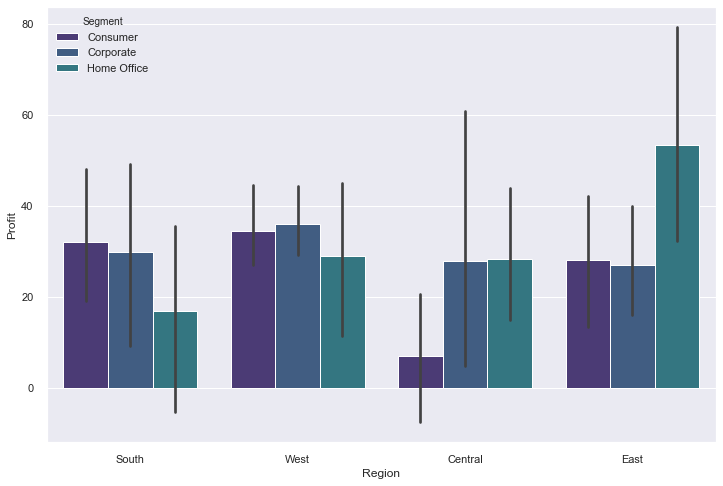

In [18]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = SuperStoreData , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

### Overall each Segment is profitable.
### 4.4 Profit distribution by Region

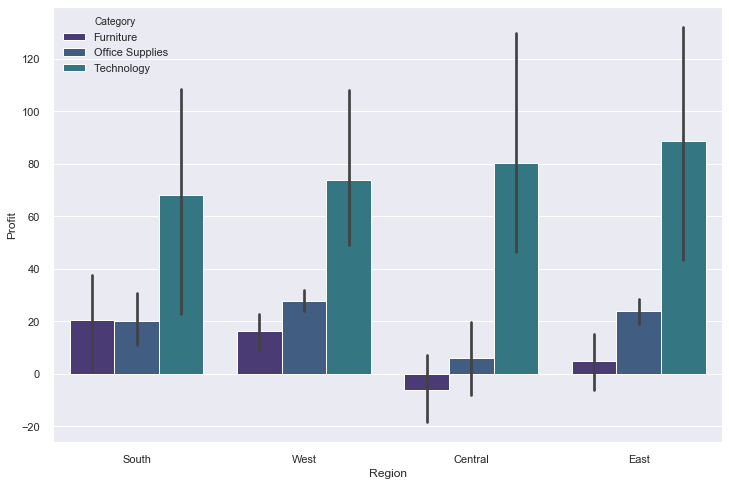

In [19]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = SuperStoreData , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

## "Furniture" Category is the only loss making sector that to only in Central Region

### 4.5 Investigating losses in Furniture category in the Central region

In [20]:
# Grouping Data by Region and only slicing Data for Central Region from whole Data Set
gb_Central = list(SuperStoreData.groupby("Region"))[0][1]

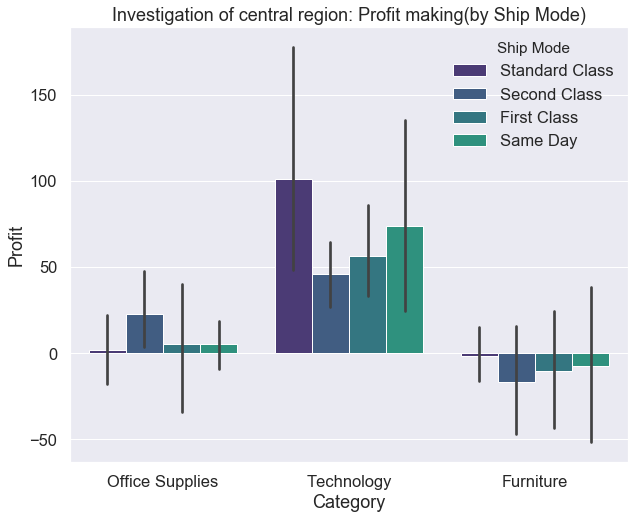

In [21]:
# Investing Further in cenral Region 
plt.figure(figsize = (10,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = gb_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

### Losses are inccured in Furniture Cateory irrespective to ship mode in Central Region

In [22]:
# Slicing Furniture Data from whole data set
gb_Category_Furniture =list(list(SuperStoreData.groupby("Region"))[0][1].groupby("Category"))[0][1]

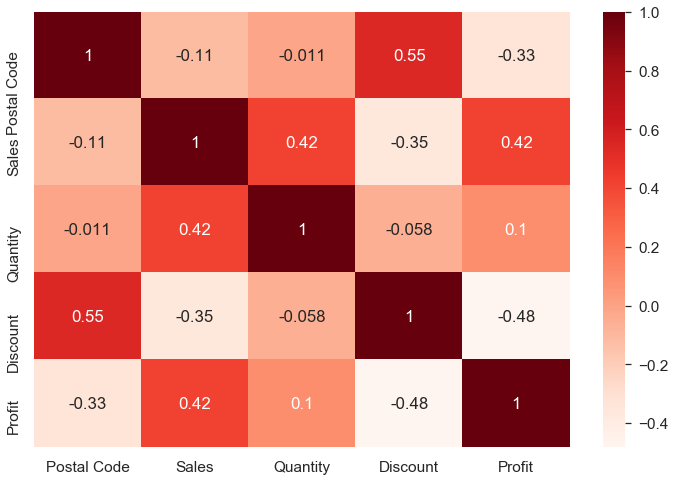

In [23]:
# Correlation matrix Heat Map to identify key factors influening profits
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(gb_Category_Furniture.corr() , annot = True, cmap ="Reds")
plt.show()

### There is unusually high positive correlation between Postal Code and Discount
### Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values... i.e. they are not helping in improving sales of "Furniture" category of the company


### 4.6 Investigating individual performance by states in the central region

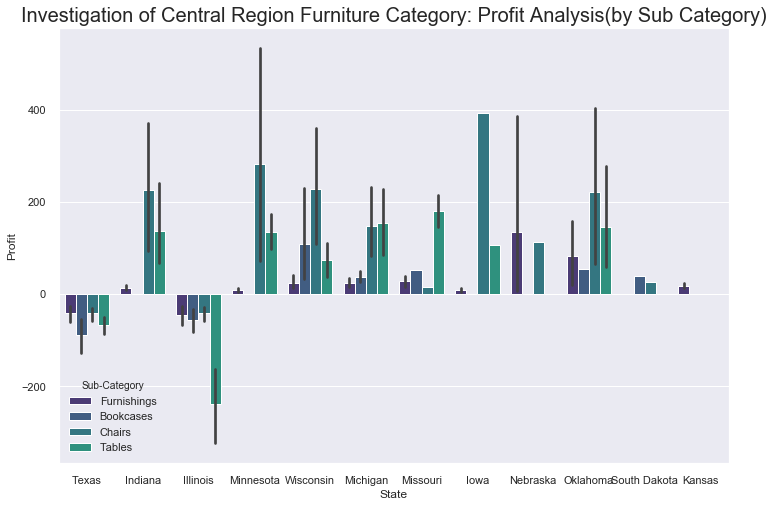

In [24]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Sub-Category")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)", fontsize = 20)
plt.show()

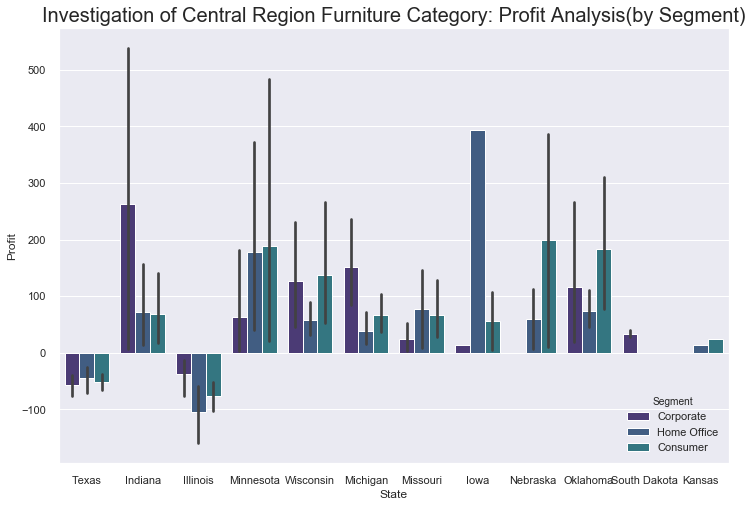

In [25]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Segment)", fontsize = 20)
plt.show()

### Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region 
### Losses in Tables Sub Category is significanlty high.

### 4.7 So, what is it they are doing diffrently?

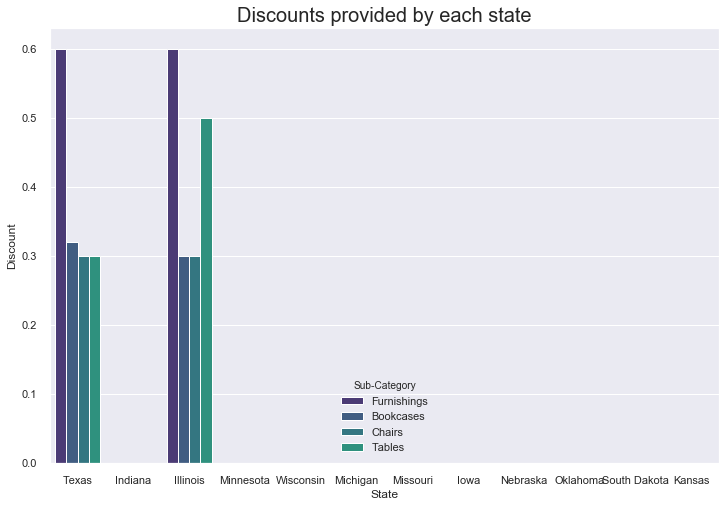

In [26]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

### Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts.

### Also, these discounts are crazy high!
### 1. 60% on Furnishings
### 2. 30% on Bookcases and Chairs
### 3. 50% disount on Tables in Illinois and 30% in Texas

### 4.8 Are these discounts driving sales up?.... NO!

<Figure size 864x576 with 0 Axes>

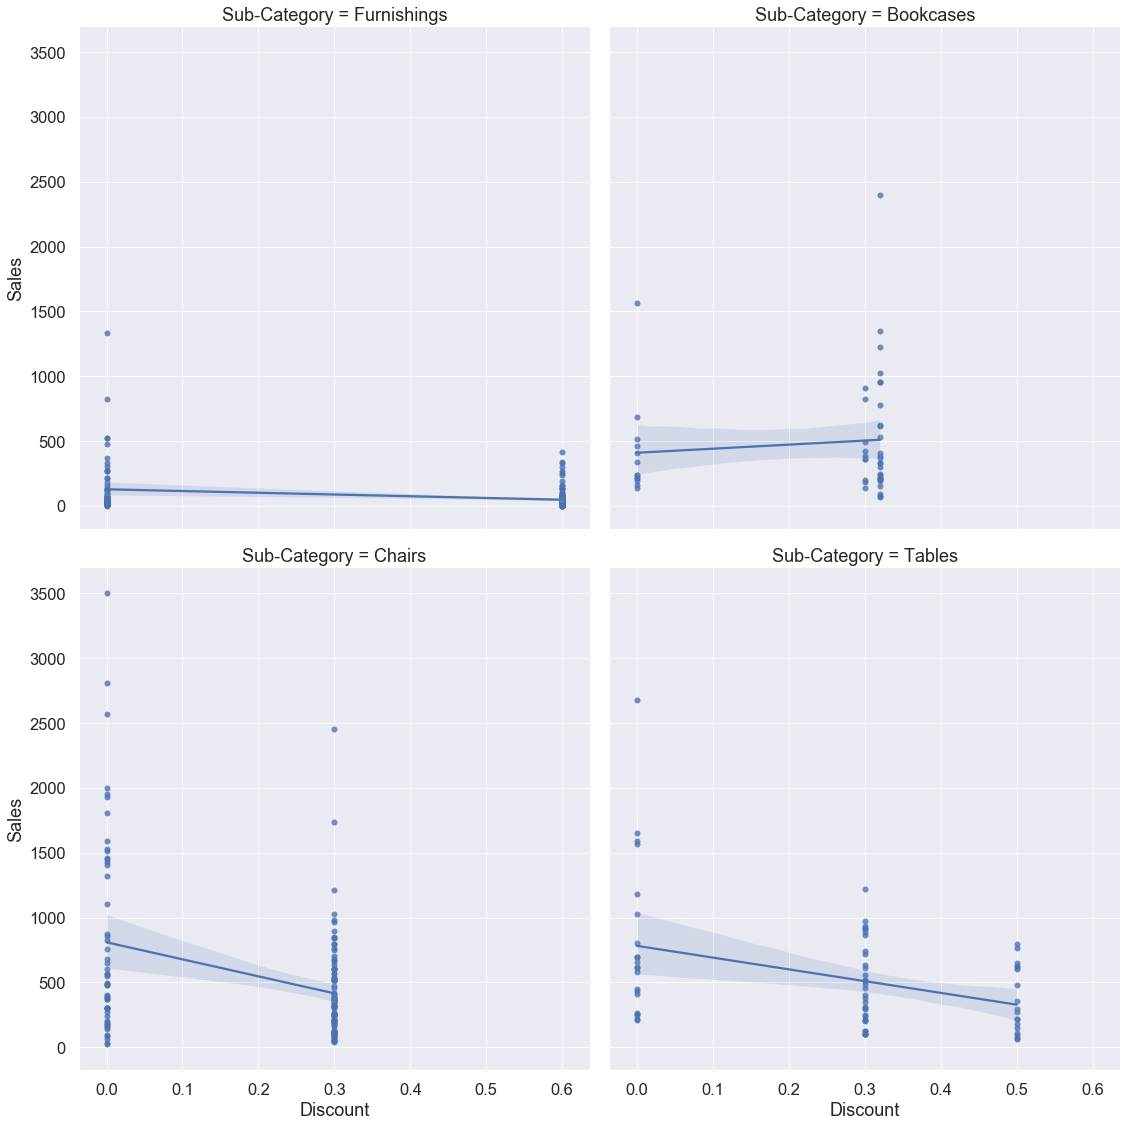

In [27]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.lmplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", aspect = 1, height = 8, col ="Sub-Category", col_wrap= 2)
plt.show()

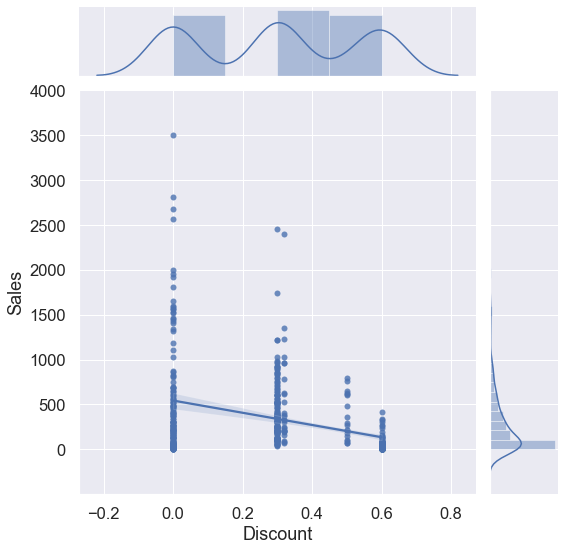

In [28]:
# Jiont plot for studying overall relationship between Sales and Discounts
sns.set(font_scale=1.5)
sns.jointplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", height= = 8, kind = "reg")
plt.show()

### Actually Sales tend to do down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region.

# 5. Insights from Exploratory Data Analysis (Summary)


### 4.1 What are total Sales and Profits of the company?
  1. Total Sales = 2,296,195.56 USD
  2. Total Profits = 286,241.42 USD
  
### 4.2 Top 10 States by Sales and Profits
  1. #### Top 10 States by Sales:
'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'
  2. #### Top 10 States by Profit:
'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'
  3. #### Californi and New York are far ahead of their competitor states in terms of Profits.
  4. #### Discounts are triggering losses.
  
### 4.3 Distrubution of Profits across diffrent regions
  1. Overall each Segment is profitable.
  
### 4.4 Profit distribution by Region
 1. "Furniture" Category is the only loss making sector that to only in Central Region
 
### 4.5 Investigating losses in Furniture category in the Central region
 1. Losses are inccured in Furniture Cateory irrespective to ship mode
 2. There is unusually high positive correlation between Postal Code and Discount
 3. Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values...i.e. they are not helping in improving sales of "Furniture" category of the company

### 4.6 Investigating individual performance by states in the central region
 1. Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region 
 2. Losses in Tables Sub Category is significanlty high.
 
### 4.7 So, what is it they are doing diffrently?
 1. Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts.
 2. Also, these discounts are crazy high!
    1. 60% on Furnishings
    2. 30% on Bookcases and Chairs
    3. 50% disount on Tables in Illinois and 30% in Texas

### 4.8 Are these discounts driving sales up?.... NO!
 1. Actually Sales tend to do down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region.